In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
crimes_df = pd.read_csv('Crimes_-_2020_to_Present.csv')
crimes_df.head(10)

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude
0,12014684,JD189901,3/17/2020 21:30,THEFT,$500 AND UNDER,STREET,False,False,16,45,2020,3/25/2020 15:45,41.952052,-87.754660
1,12571973,JE482457,12/19/2021 7:23,BATTERY,SIMPLE,SIDEWALK,True,True,9,15,2021,9/12/2022 16:45,41.816657,-87.695689
2,12012127,JD189186,3/18/2020 2:03,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,False,True,11,28,2020,3/25/2020 15:47,41.877110,-87.723990
3,12012330,JD189367,3/18/2020 8:50,ASSAULT,SIMPLE,RESIDENCE,False,False,25,35,2020,3/25/2020 15:47,41.923369,-87.731634
4,12014760,JD192130,3/18/2020 13:00,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER (SPECIFY),False,False,11,28,2020,3/25/2020 15:47,41.879264,-87.743971
5,12012667,JD189808,3/18/2020 17:35,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,15,28,2020,3/25/2020 15:47,41.876128,-87.745112
6,12015216,JD192637,3/16/2020 0:05,THEFT,$500 AND UNDER,STREET,False,False,2,3,2020,3/25/2020 15:45,41.804781,-87.618038
7,12016052,JD193500,3/18/2020 23:15,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE,False,False,19,43,2020,3/25/2020 15:47,NaN,NaN
8,12012728,JD189837,3/18/2020 18:00,ROBBERY,ARMED - HANDGUN,STREET,False,False,10,24,2020,3/25/2020 15:47,41.860148,-87.712804
9,12012604,JD189554,3/18/2020 14:04,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",RESIDENCE,False,True,4,7,2020,3/25/2020 15:47,41.707542,-87.565714


In [3]:
crimes_df.shape

(10219, 14)

In [4]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10219 entries, 0 to 10218
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    10219 non-null  int64  
 1   Case Number           10219 non-null  object 
 2   Date                  10219 non-null  object 
 3   Primary Type          10219 non-null  object 
 4   Description           10219 non-null  object 
 5   Location Description  10171 non-null  object 
 6   Arrest                10219 non-null  bool   
 7   Domestic              10219 non-null  bool   
 8   District              10219 non-null  int64  
 9   Ward                  10219 non-null  int64  
 10  Year                  10219 non-null  int64  
 11  Updated On            10219 non-null  object 
 12  Latitude              10121 non-null  float64
 13  Longitude             10121 non-null  float64
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 978.1+ KB


In [5]:
crimes_df_clean = crimes_df.dropna(how='any')
crimes_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10080 entries, 0 to 10218
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    10080 non-null  int64  
 1   Case Number           10080 non-null  object 
 2   Date                  10080 non-null  object 
 3   Primary Type          10080 non-null  object 
 4   Description           10080 non-null  object 
 5   Location Description  10080 non-null  object 
 6   Arrest                10080 non-null  bool   
 7   Domestic              10080 non-null  bool   
 8   District              10080 non-null  int64  
 9   Ward                  10080 non-null  int64  
 10  Year                  10080 non-null  int64  
 11  Updated On            10080 non-null  object 
 12  Latitude              10080 non-null  float64
 13  Longitude             10080 non-null  float64
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 1.0+ MB


In [6]:
crimes_df_clean.shape

(10080, 14)

Are there any significant differences or similarities between infraction counts and years?

group by value counts--years

In [7]:
per_year_counts = crimes_df["Year"].value_counts()
per_year_counts

Year
2020    8046
2021    1519
2023     610
2022      44
Name: count, dtype: int64

In [8]:
crimes20 = crimes_df_clean[(crimes_df_clean["Year"] == 2020)]
crimes20.head()

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude
0,12014684,JD189901,3/17/2020 21:30,THEFT,$500 AND UNDER,STREET,False,False,16,45,2020,3/25/2020 15:45,41.952052,-87.754660
2,12012127,JD189186,3/18/2020 2:03,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,False,True,11,28,2020,3/25/2020 15:47,41.877110,-87.723990
3,12012330,JD189367,3/18/2020 8:50,ASSAULT,SIMPLE,RESIDENCE,False,False,25,35,2020,3/25/2020 15:47,41.923369,-87.731634
4,12014760,JD192130,3/18/2020 13:00,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER (SPECIFY),False,False,11,28,2020,3/25/2020 15:47,41.879264,-87.743971
5,12012667,JD189808,3/18/2020 17:35,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,15,28,2020,3/25/2020 15:47,41.876128,-87.745112


In [9]:
Clean_Crimes20 = crimes20[~crimes20['District'].isin([19,20,22,24,25])]
Clean_Crimes20.head()

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude
0,12014684,JD189901,3/17/2020 21:30,THEFT,$500 AND UNDER,STREET,False,False,16,45,2020,3/25/2020 15:45,41.952052,-87.754660
2,12012127,JD189186,3/18/2020 2:03,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,False,True,11,28,2020,3/25/2020 15:47,41.877110,-87.723990
4,12014760,JD192130,3/18/2020 13:00,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER (SPECIFY),False,False,11,28,2020,3/25/2020 15:47,41.879264,-87.743971
5,12012667,JD189808,3/18/2020 17:35,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,15,28,2020,3/25/2020 15:47,41.876128,-87.745112
6,12015216,JD192637,3/16/2020 0:05,THEFT,$500 AND UNDER,STREET,False,False,2,3,2020,3/25/2020 15:45,41.804781,-87.618038


In [10]:

from datetime import datetime 

Clean_Crimes20['month'] = pd.DatetimeIndex(Clean_Crimes20['Date']).month


/var/folders/nx/flhqw_090sdffg9ccwg45xlw0000gn/T/ipykernel_29807/3483121747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean_Crimes20['month'] = pd.DatetimeIndex(Clean_Crimes20['Date']).month


In [11]:
Temp = pd.to_datetime(Clean_Crimes20['month'].astype(str), format='%m')
#crimes20['Month_Name2'] = datetime.strftime(crimes20['Month_Name'], "%m")
Temp2 = Temp.dt.month_name()
Temp2

0           March
2           March
4           March
5           March
6           March
           ...   
10066    December
10067    December
10068    December
10070    December
10076    December
Name: month, Length: 6555, dtype: object

In [12]:
Clean_Crimes20['Month_Name'] = Temp2
Clean_Crimes20.head()

/var/folders/nx/flhqw_090sdffg9ccwg45xlw0000gn/T/ipykernel_29807/673456871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean_Crimes20['Month_Name'] = Temp2


,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude,month,Month_Name
0,12014684,JD189901,3/17/2020 21:30,THEFT,$500 AND UNDER,STREET,False,False,16,45,2020,3/25/2020 15:45,41.952052,-87.754660,3,March
2,12012127,JD189186,3/18/2020 2:03,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,False,True,11,28,2020,3/25/2020 15:47,41.877110,-87.723990,3,March
4,12014760,JD192130,3/18/2020 13:00,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER (SPECIFY),False,False,11,28,2020,3/25/2020 15:47,41.879264,-87.743971,3,March
5,12012667,JD189808,3/18/2020 17:35,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,15,28,2020,3/25/2020 15:47,41.876128,-87.745112,3,March
6,12015216,JD192637,3/16/2020 0:05,THEFT,$500 AND UNDER,STREET,False,False,2,3,2020,3/25/2020 15:45,41.804781,-87.618038,3,March


In [13]:
_Clean_Crimes20 =Clean_Crimes20.set_index('Primary Type')
_Clean_Crimes20.head()

,ID,Case Number,Date,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude,month,Month_Name
Primary Type,,,,,,,,,,,,,,,
THEFT,12014684,JD189901,3/17/2020 21:30,$500 AND UNDER,STREET,False,False,16,45,2020,3/25/2020 15:45,41.952052,-87.754660,3,March
MOTOR VEHICLE THEFT,12012127,JD189186,3/18/2020 2:03,AUTOMOBILE,APARTMENT,False,True,11,28,2020,3/25/2020 15:47,41.877110,-87.723990,3,March
DECEPTIVE PRACTICE,12014760,JD192130,3/18/2020 13:00,CREDIT CARD FRAUD,OTHER (SPECIFY),False,False,11,28,2020,3/25/2020 15:47,41.879264,-87.743971,3,March
NARCOTICS,12012667,JD189808,3/18/2020 17:35,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,15,28,2020,3/25/2020 15:47,41.876128,-87.745112,3,March
THEFT,12015216,JD192637,3/16/2020 0:05,$500 AND UNDER,STREET,False,False,2,3,2020,3/25/2020 15:45,41.804781,-87.618038,3,March


What patterns do we see in months vs. crime rate?

groupby values--months
first extract month ranges and assign months to numerical correlation
then take the number of incidents and groupby month 
put into pie chart with percentages
put into bar graphs by month==sort by greatest to least and by month in chronological order

In [14]:
per_month_counts = Clean_Crimes20["Month_Name"].value_counts()
per_month_counts

Month_Name
March        3199
August       2063
December     1076
July           55
November       53
February       48
January        23
April          11
June            9
October         9
May             8
September       1
Name: count, dtype: int64

In [15]:
Clean_Crimes20[Clean_Crimes20 ["Month_Name"] == 'September']

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude,month,Month_Name
9697,12247390,JD461930,9/7/2020 17:33,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,False,6,6,2020,12/20/2020 15:46,41.753887,-87.611358,9,September


In [16]:
crime_counts = Clean_Crimes20["Primary Type"].value_counts()
crime_counts

Primary Type
BATTERY                              1455
THEFT                                1110
CRIMINAL DAMAGE                       858
ASSAULT                               601
BURGLARY                              441
OTHER OFFENSE                         391
DECEPTIVE PRACTICE                    367
MOTOR VEHICLE THEFT                   308
WEAPONS VIOLATION                     268
ROBBERY                               265
NARCOTICS                             196
CRIMINAL TRESPASS                     112
OFFENSE INVOLVING CHILDREN             46
SEX OFFENSE                            32
PUBLIC PEACE VIOLATION                 27
CRIMINAL SEXUAL ASSAULT                26
INTERFERENCE WITH PUBLIC OFFICER       19
ARSON                                   9
STALKING                                8
KIDNAPPING                              6
INTIMIDATION                            4
CONCEALED CARRY LICENSE VIOLATION       3
GAMBLING                                2
LIQUOR LAW VIOLATION 

In [17]:
TopThree = Clean_Crimes20[(Clean_Crimes20['Primary Type'] == 'BATTERY') | (Clean_Crimes20['Primary Type'] == 'THEFT') | (Clean_Crimes20['Primary Type'] == 'CRIMINAL DAMAGE')]
TopThree

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude,month,Month_Name
0,12014684,JD189901,3/17/2020 21:30,THEFT,$500 AND UNDER,STREET,False,False,16,45,2020,3/25/2020 15:45,41.952052,-87.754660,3,March
6,12015216,JD192637,3/16/2020 0:05,THEFT,$500 AND UNDER,STREET,False,False,2,3,2020,3/25/2020 15:45,41.804781,-87.618038,3,March
9,12012604,JD189554,3/18/2020 14:04,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",RESIDENCE,False,True,4,7,2020,3/25/2020 15:47,41.707542,-87.565714,3,March
15,12014889,JD191830,3/16/2020 15:20,THEFT,FROM BUILDING,OTHER (SPECIFY),False,False,5,34,2020,3/25/2020 15:45,41.677662,-87.652872,3,March
16,12014561,JD191956,3/18/2020 13:14,THEFT,OVER $500,RESIDENCE,False,False,16,38,2020,3/25/2020 15:47,41.945773,-87.831557,3,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10057,12244101,JD457920,12/13/2020 10:43,BATTERY,AGGRAVATED - HANDGUN,ALLEY,False,False,8,16,2020,12/20/2020 15:50,41.786462,-87.690275,12,December
10058,12244370,JD458335,12/13/2020 20:00,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,17,33,2020,12/20/2020 15:50,41.967337,-87.718222,12,December
10059,12244327,JD458119,12/13/2020 6:16,CRIMINAL DAMAGE,TO PROPERTY,DEPARTMENT STORE,False,False,8,23,2020,12/20/2020 15:50,41.799666,-87.723345,12,December
10060,12244493,JD458411,12/13/2020 22:00,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,10,24,2020,12/20/2020 15:50,41.860006,-87.718895,12,December


In [18]:
LineData = TopThree.groupby(['Primary Type']).count()
#LineData2 = LineData[['ID']]
#LineData2['Primary Type'] = LineData2.index
LineData

,ID,Case Number,Date,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude,month,Month_Name
Primary Type,,,,,,,,,,,,,,,
BATTERY,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455
CRIMINAL DAMAGE,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858
THEFT,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110


In [ ]:
#Goal = create a line chart that compares the monthly dispersment of the top three incidents: Battery, Theft, Criminal Damage
#gather all of the Battery incidents over the year
Battery_df = Clean_Crimes20.loc[Clean_Crimes20['Primary Type'] == "BATTERY"]
Battery_df.head()

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude,month,Month_Name
9,12012604,JD189554,3/18/2020 14:04,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",RESIDENCE,False,True,4,7,2020,3/25/2020 15:47,41.707542,-87.565714,3,March
34,12237573,JD450254,12/5/2020 10:55,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,SIDEWALK,True,False,7,6,2020,12/18/2020 15:48,41.772728,-87.628865,12,December
35,12239084,JD451963,12/7/2020 11:03,BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,11,28,2020,12/18/2020 15:48,41.873509,-87.701006,12,December
43,12225434,JD436271,11/19/2020 20:40,BATTERY,AGGRAVATED OF A CHILD,APARTMENT,True,False,9,11,2020,4/23/2021 16:49,41.837639,-87.651133,11,November
44,12242604,JD456065,12/11/2020 12:18,BATTERY,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING ...,RESIDENCE,False,True,5,9,2020,12/18/2020 15:51,41.713489,-87.629673,12,December


In [ ]:
Battery_Month = Battery_df.groupby(["Month_Name"]).count()
Battery_Month

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude,month
Month_Name,,,,,,,,,,,,,,,
August,421,421,421,421,421,421,421,421,421,421,421,421,421,421,421
December,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233
February,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
July,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
March,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787
November,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [ ]:
#Battery_Pie = Battery_df.groupby(["Description"]).count()
#Battery_Pie

,ID,Case Number,Date,Primary Type,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude,month,Month_Name
Description,,,,,,,,,,,,,,,
"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY",19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
AGGRAVATED - HANDGUN,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
"AGGRAVATED - HANDS, FISTS, FEET, NO / MINOR INJURY",6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
"AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
AGGRAVATED - KNIFE / CUTTING INSTRUMENT,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
AGGRAVATED - OTHER DANGEROUS WEAPON,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61
AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING INSTRUMENT,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS WEAPON,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
AGGRAVATED OF A CHILD,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
#gather all of the Theft incidents over the year
Theft_df = Clean_Crimes20.loc[Clean_Crimes20['Primary Type'] == "THEFT"]
Theft_df.head()

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude,month,Month_Name
0,12014684,JD189901,3/17/2020 21:30,THEFT,$500 AND UNDER,STREET,False,False,16,45,2020,3/25/2020 15:45,41.952052,-87.754660,3,March
6,12015216,JD192637,3/16/2020 0:05,THEFT,$500 AND UNDER,STREET,False,False,2,3,2020,3/25/2020 15:45,41.804781,-87.618038,3,March
15,12014889,JD191830,3/16/2020 15:20,THEFT,FROM BUILDING,OTHER (SPECIFY),False,False,5,34,2020,3/25/2020 15:45,41.677662,-87.652872,3,March
16,12014561,JD191956,3/18/2020 13:14,THEFT,OVER $500,RESIDENCE,False,False,16,38,2020,3/25/2020 15:47,41.945773,-87.831557,3,March
17,12013948,JD191248,3/17/2020 21:00,THEFT,$500 AND UNDER,APARTMENT,False,False,4,8,2020,3/25/2020 15:45,41.756349,-87.577312,3,March


In [ ]:
Theft_Month = Theft_df.groupby(["Month_Name"]).count()
Theft_Month

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude,month
Month_Name,,,,,,,,,,,,,,,
April,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
August,301,301,301,301,301,301,301,301,301,301,301,301,301,301,301
December,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172
February,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
January,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
July,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
June,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
March,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588
November,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [ ]:
Theft_Pie = Theft_df.groupby(["Description"]).count()
Theft_Pie

,ID,Case Number,Date,Primary Type,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude,month,Month_Name
Description,,,,,,,,,,,,,,,
$500 AND UNDER,519,519,519,519,519,519,519,519,519,519,519,519,519,519,519
ATTEMPT THEFT,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
DELIVERY CONTAINER THEFT,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
FROM BUILDING,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106
OVER $500,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264
POCKET-PICKING,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
PURSE-SNATCHING,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
RETAIL THEFT,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186


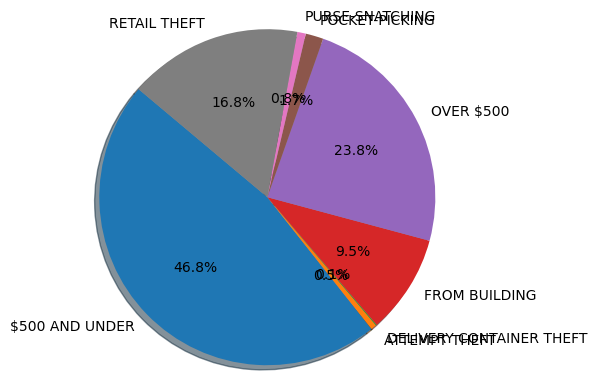

In [30]:
# The colors of each section of the pie chart
colors = ["green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]

# Labels for the sections of our pie chart
labels = ["$500 AND UNDER", "ATTEMPT THEFT", "DELIVERY CONTAINER THEFT", "FROM BUILDING", "OVER $500", "POCKET-PICKING", "PURSE-SNATCHING", "RETAIL THEFT"]

# The values of each section of the pie chart
sizes = [519, 6, 1, 106, 264, 19, 9, 186]


plt.pie(sizes, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

In [ ]:

#gather all of the Criminal Damage incidents over the year
CD_df = Clean_Crimes20.loc[Clean_Crimes20['Primary Type'] == "CRIMINAL DAMAGE"]
CD_df.head()


,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude,month,Month_Name
50,12244117,JD457469,12/11/2020 16:30,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,10,22,2020,12/18/2020 15:51,41.848873,-87.712480,12,December
54,12242940,JD456642,12/11/2020 21:53,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,6,21,2020,12/18/2020 15:51,41.742641,-87.661626,12,December
55,12243124,JD456747,12/11/2020 22:36,CRIMINAL DAMAGE,TO PROPERTY,GAS STATION,False,False,3,20,2020,12/18/2020 15:51,41.773018,-87.612658,12,December
57,12242257,JD455728,12/11/2020 0:15,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,10,24,2020,12/18/2020 15:51,41.862529,-87.704007,12,December
72,12243168,JD456842,12/11/2020 19:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,10,24,2020,12/18/2020 15:51,41.859830,-87.726206,12,December


In [ ]:
CD_Month = CD_df.groupby(["Month_Name"]).count()
CD_Month

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude,month
Month_Name,,,,,,,,,,,,,,,
August,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
December,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137
February,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
January,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
July,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
June,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
March,457,457,457,457,457,457,457,457,457,457,457,457,457,457,457


In [ ]:
CD_Pie = CD_df.groupby(["Description"]).count()
CD_Pie

,ID,Case Number,Date,Primary Type,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude,month,Month_Name
Description,,,,,,,,,,,,,,,
CRIMINAL DEFACEMENT,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
TO CITY OF CHICAGO PROPERTY,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
TO PROPERTY,445,445,445,445,445,445,445,445,445,445,445,445,445,445,445
TO STATE SUPPORTED PROPERTY,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
TO VEHICLE,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354


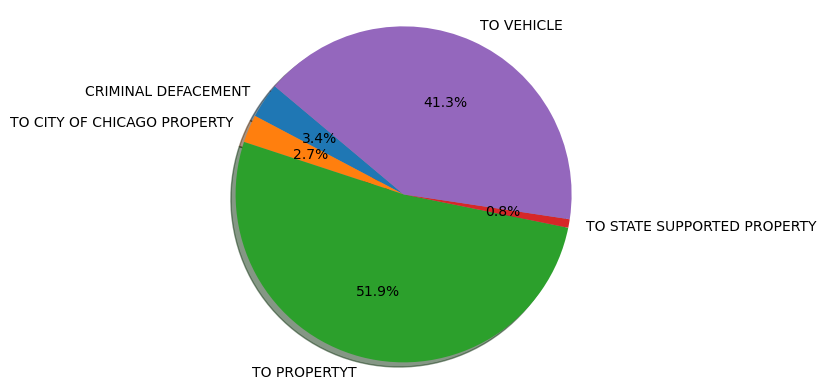

In [29]:
# The colors of each section of the pie chart
colors = ["green","lightblue","orange","red","purple"]

# Labels for the sections of our pie chart
labels = ["CRIMINAL DEFACEMENT", "TO CITY OF CHICAGO PROPERTY", "TO PROPERTYT", "TO STATE SUPPORTED PROPERTY", "TO VEHICLE"]

# The values of each section of the pie chart
sizes = [29, 23, 445, 7, 354]

# Tells matplotlib to separate the "Humans" section from the others


plt.pie(sizes, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

Text(0.5, 0, 'Months')

<Figure size 2400x1200 with 0 Axes>

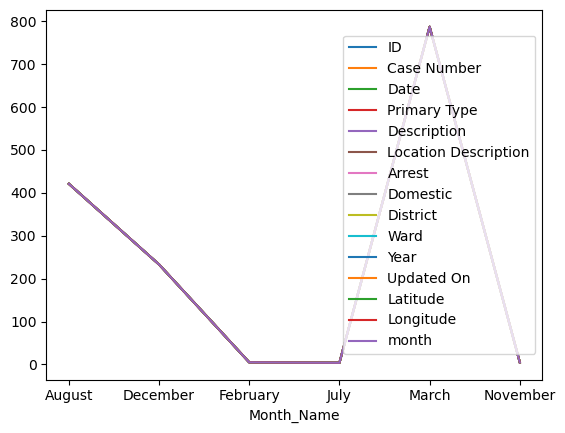

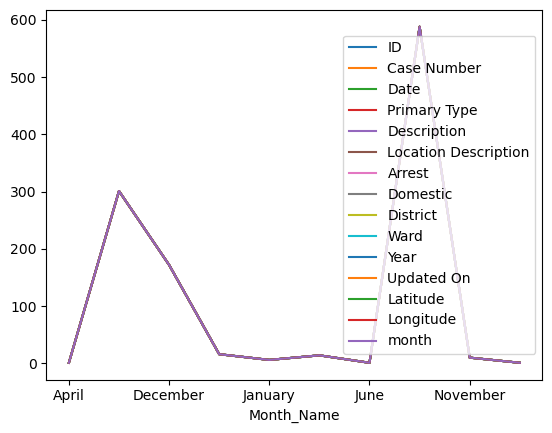

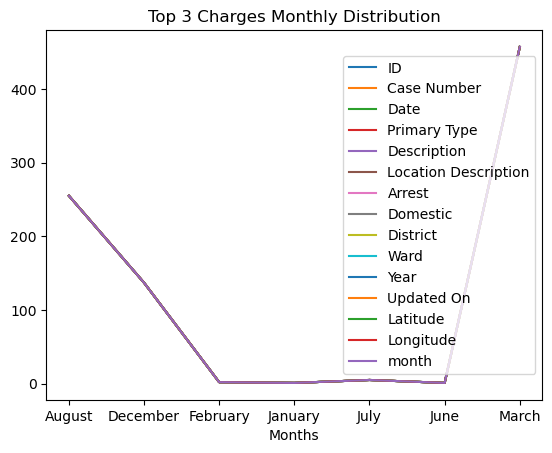

In [ ]:

# code
# Visualizing the monthly charge of the top three charges
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot incident counts.
# in plot method we set the label and color of the curve.
Battery_Month.plot(label='Battery')
Theft_Month.plot(label='Theft')
CD_Month.plot(label='Criminal Damage')
  
# adding title to the plot
plt.title('Top 3 Charges Monthly Distribution')
  
# adding Label to the x-axis
plt.xlabel('Months')
  
# adding legend to the curve
#plt.legend()

Bar chart which answers: Which Primary Type was most frequently charged?

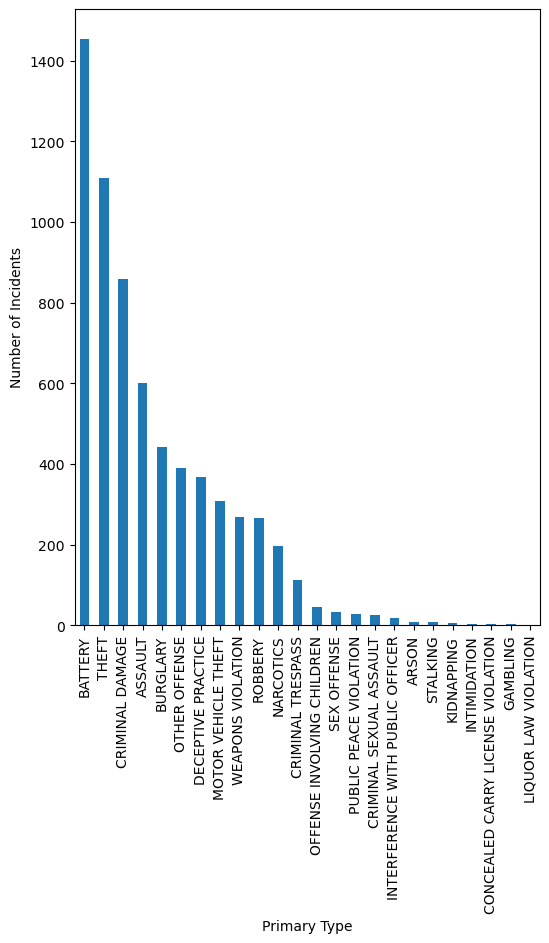

<Figure size 640x480 with 0 Axes>

In [ ]:
# Create a bar chart based off of the group series from before
crime_counts_bar = crime_counts.plot(kind='bar', figsize=(6,8))

# Set the xlabel and ylabel using class methods
crime_counts_bar.set_xlabel("Primary Type")
crime_counts_bar.set_ylabel("Number of Incidents")

plt.show()
plt.tight_layout()